# <u> Part A: Model Code </u>

### 5. Euclidean Distance

In [65]:
import numpy as np
from numpy.linalg import norm
from sortedcontainers import SortedList
 
def euclidianDistance(a,b):    
    return  np.linalg.norm(a - b)

### 6. Manhattan Distance

In [5]:
def ManhattanDistance(a,b):
    return np.absolute(np.sum((a-b)))

### 7. Accuracy and generalization error of two vectors

In [6]:
'''
This function returns the accuracy and the generalization error.
Y is the target from the data set.
Accuracy is the ratio of the correct predictions and the total number of predictions.
General Error = 1 - accuracy 
'''

def accuracyGeneralizationError(Y, Y_predicted ):
    accuracy = np.mean(Y == Y_predicted)
    gn = 1 - accuracy    
    return accuracy, gn  

### 8. precision, recall and F1 score

In [7]:
# Precision
def precision(Y, Y_predicted):
    #truePositive = np.sum(Y == Y_predicted).astype(np.int)
    truePositive = 0
    falsePositive =0
    totalTruePositive = 0
    for i, k in zip(Y, Y_predicted):
        if i ==1 and k == 1:
            truePositive +=1
            totalTruePositive +=1
        if i == 0 and k == 1:
            falsePositive +=1
            
    if  (truePositive + falsePositive) == 0:
        return 0
    else:
        return truePositive / (truePositive + falsePositive )  

In [8]:
# recall
def recall(Y, Y_predicted):
    #truePositive = np.sum(Y == Y_predicted).astype(np.int)
    truePositive = 0
    falseNegative = 0
    for i, k in zip(Y, Y_predicted):
        if i == 1 and k == 0:
            falseNegative +=1
        if i ==1 and k ==1:
            truePositive += 1
            
    if (truePositive + falseNegative) == 0:
        return 0
    else:           
        return truePositive / ( truePositive + falseNegative )


In [9]:
# F1 score
def F1_score(Y, Y_predicted):
    
    prec =0
    falseNegative= 0
    truePositive = 0
    falsePositive = 0
    recal = 0
    
    for i, k in zip(Y, Y_predicted):
        if i == 1 and k == 0:
            falseNegative +=1
        if i ==1 and k ==1:
            truePositive += 1
        if i == 0 and k == 1:
            falsePositive +=1
     
    if (truePositive + falseNegative) == 0 and (truePositive + falsePositive) ==0 :
        return 0
    elif truePositive + falseNegative == 0:
        recal =0
    elif truePositive + falsePositive ==0:
        prec =0
    else:
        recal = truePositive / ( truePositive + falseNegative )  
        prec = truePositive / (truePositive + falsePositive )  
    
    return ( (prec*recal) / (prec+recal) )*2


### 9. Confusion matrix

In [10]:
def confusion_matrix(Y, Y_predicted):
    
    matrix = np.zeros((2,2))
    
    truePositive= 0
    trueNegative = 0 
    falseNegative = 0
    falsePositive = 0
    #truePositive = np.sum(Y == Y_predicted) #.astype(np.int)
    
    for i, k in zip(Y, Y_predicted):
        if i == 0 and k == 0 :  
            trueNegative +=1
        if i == 1 and k == 0 :
            falseNegative +=1
        if i == 0 and k == 1 :
            falsePositive += 1
        if i == 1 and k ==1:
            truePositive += 1
     
    matrix[0][0] = trueNegative
    matrix[0][1] = falsePositive
    matrix[1][1] = truePositive
    matrix[1][0] = falseNegative
            
    return matrix

# 10. Write a function to generate the Receiver Operating Characteristic (ROC) curve 

In [11]:
thresholds=  [ 1, 0.9,   0.73,  0.33,  0.2, 0.1, 0.06 ]


def roc_curve(thresholds, y_train, predict_prob, confus_matrix, recall):
    
    classified = np.zeros(len(predict_prob))
    fpr = [] 
    tpr = []
    for i, t in enumerate(thresholds):
        for j, p in enumerate(predict_prob):
            if p > t:
                classified[j] = 1
            else:
                classified[j] = 0
        
        tpr.append( recall(y_train,classified) )
        
        conf_table =   confus_matrix(y_train, classified)
        fpr.append( conf_table[0][1] / (conf_table[0][1] + conf_table[0][0]) ) # FP/FP+TN
    return fpr, tpr

In [12]:

def plot_roc_curve(fpr, tpr, label =None):
    
    import matplotlib.pyplot as plt
    
    # these 3 line below are unnecessaary
#     conf_matrix = confusion_matrix(Y, Y_predicted)
#     FPR = conf_matrix[0][1]/ (conf_matrix[0][1] + conf_matrix[0][0])
#     TPR = recall(Y, Y_predicted)
    
    plt.style.use('ggplot')

    fig = plt.figure(figsize=(10, 6))

    plt.plot(fpr, tpr, color='darkorange', linewidth=8, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Test Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.show()

# 11. Write a function to generate the Receiver Operating Characteristic (ROC) curve 

In [13]:
# import itertools
# import operator

def auc_from_fpr_tpr(y_axis, x_axis_spacing):#(fpr, tpr, trapezoid=False):
#     inds = [i for (i, (s, e)) in enumerate(zip(fpr[: -1], fpr[1: ])) if s != e] + [len(fpr) - 1]
#     fpr, tpr = fpr[inds], tpr[inds]
#     area = 0
#     ft = zip(fpr, tpr)
#     for p0, p1 in zip(ft[: -1], ft[1: ]):
#         area += (p1[0] - p0[0]) * ((p1[1] + p0[1]) / 2 if trapezoid else p0[1])
   
    return  np.trapz(y_axis, dx = x_axis_spacing)

# 12.

# 13. KNN Model Class

In [35]:
class KNN(object): 
    
    def __init__(self):
        #self.k = k
        pass
    
    # distance_f is a function
    def fit(self, training_features, training_labels, k, distance_f, **kwargs):
        
        self.training_features = training_features
        self.training_labels = training_labels
        self.k = k
        self.distance_f = distance_f
        self.distance = 0
        self.kwargs = kwargs
        
    
    # predict
    # Need to import:
    # from sortedcontainers import SortedList
    # import numpy as np
    
    distance = 0
    def predict(self, test_features):
        
        test_features = np.array(test_features)
        
        y = np.zeros(len(test_features))
        predict_prob = np.zeros(len(test_features))
        
        #scores = []
        
        for i, x in enumerate(test_features):
            # to store (distance, label) turples
            sl = SortedList() 
           
            for j, xt in enumerate(self.training_features):
                
                distance = self.distance_f(x, xt)
                
                if len(sl) < self.k:
                   
                    sl.add(  (distance, self.training_labels[j])   )
                else:
                    if distance < sl[-1][0]:
                        del sl[-1]
                        sl.add( ( distance, self.training_labels[j] )  )      
            
            # count how many time a label appears in the sorted list
            labelCount = {}
            for _, l in sl:
                labelCount[l] = labelCount.get(l, 0) + 1 # get() return 0 if label not found; the value otherwise
            
            # Classify; find the label that appears the most
            max_votes = 0
            label = -1
            for l, labelCount in labelCount.items():
                if labelCount > max_votes:
                    max_votes = labelCount
                    label = l
            
            y[i] = label
            
            # This will help determine the prediction probability for each data points
            predict_prob[i] = max_votes/k
            
            #scores.append((label, predict_prob))
            
        return y,predict_prob
    

# Part B: Data Processing

### 14. Read in the file as a pandas data frame

In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv("datasets/DataScienceRepository/winequality-white.csv", sep=";")

### 15. Convert target into a two-category variable

In [16]:
df["quality"] = (df["quality"] > 5).astype(np.int)
df.head(9)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1


### 16. Summary of each variable in terms of mean, standard deviation, and quartiles

In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [18]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [19]:
df = df.dropna()

### 17 Shuffle the rows without affecting the order of the data

In [20]:
df =  df.sample(frac=1)

### 18. Generate pair plot using seaborn package

/home/austin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


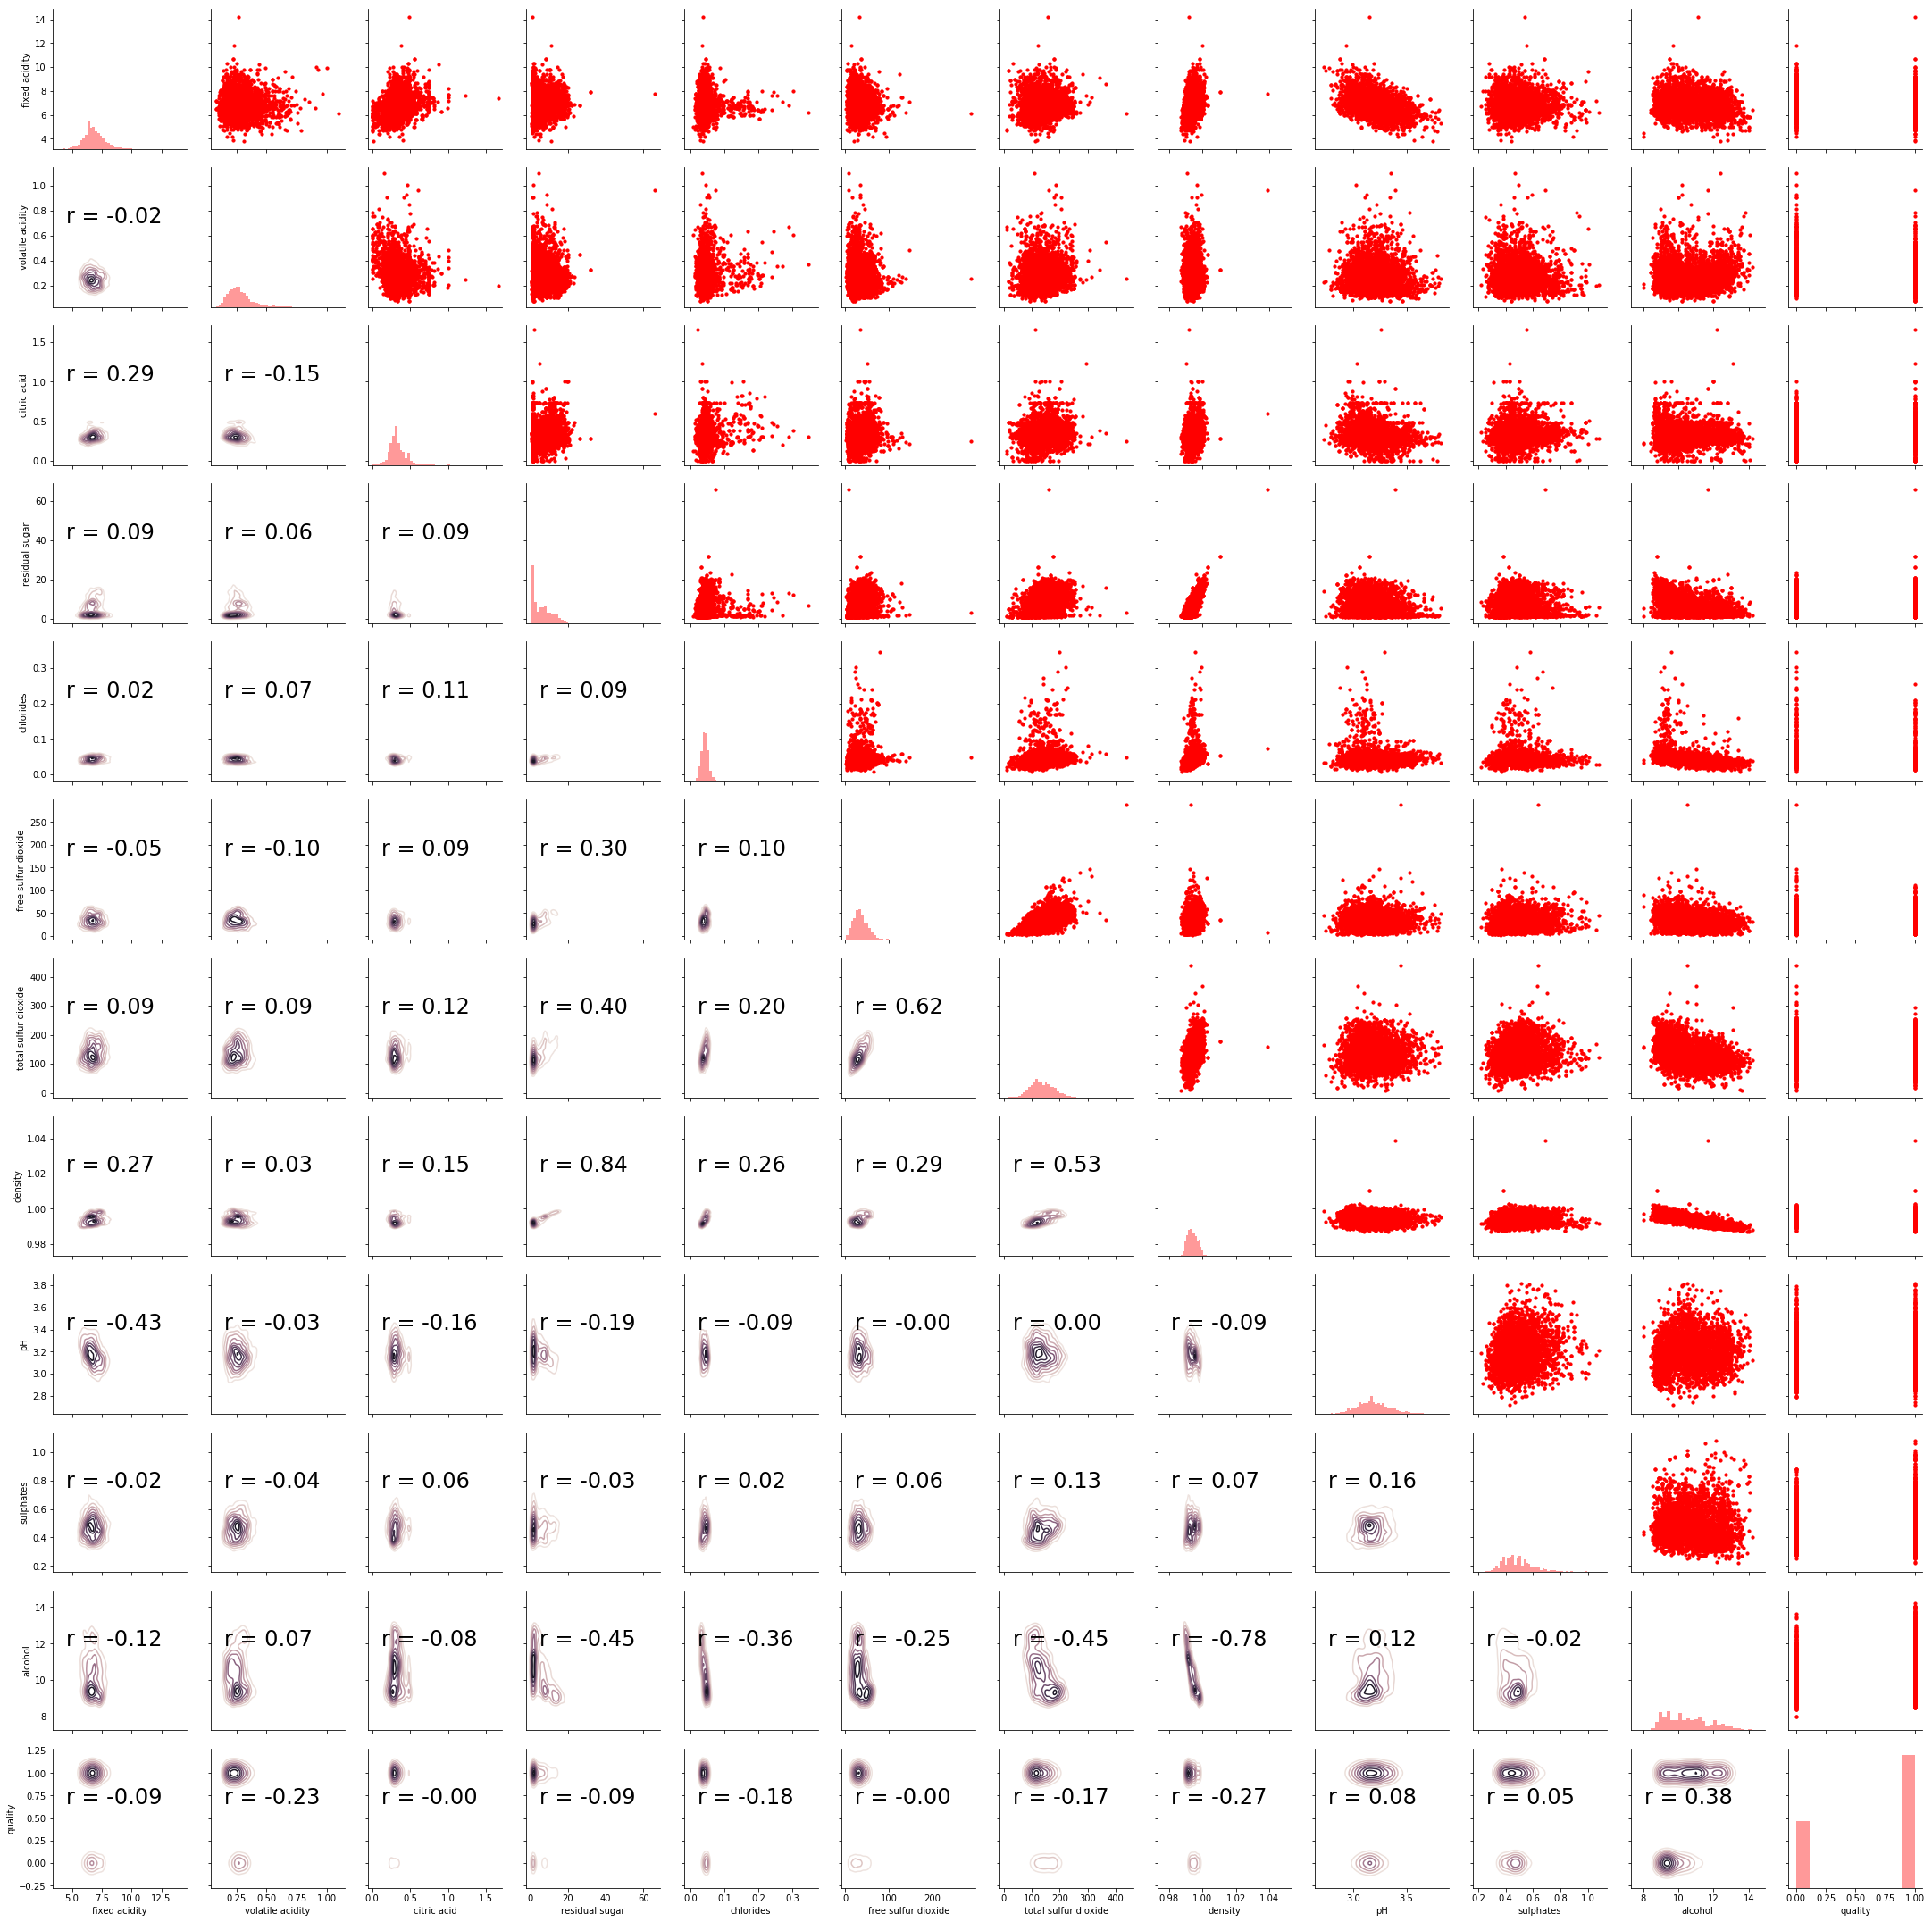

In [21]:
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

### 19. Drop the redundant features

In [22]:
# Looking for numerical correlations between the attributes and target
df.corr().abs()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.383280
density                 0.268696
volatile acidity        0.225440
chlorides               0.183939
total sulfur dioxide    0.170924
residual sugar          0.092756
fixed acidity           0.089749
pH                      0.083687
sulphates               0.051858
free sulfur dioxide     0.001278
citric acid             0.000700
Name: quality, dtype: float64

In [23]:
# correlation: density vs others
df.corr().abs()['density'].sort_values(ascending=False)

density                 1.000000
residual sugar          0.838966
alcohol                 0.780138
total sulfur dioxide    0.529881
free sulfur dioxide     0.294210
quality                 0.268696
fixed acidity           0.265331
chlorides               0.257211
citric acid             0.149503
pH                      0.093591
sulphates               0.074493
volatile acidity        0.027114
Name: density, dtype: float64

In [24]:
# Because 'residual sugar' and 'alcohol' are highly correlated to density, let check there are related to each other
df.corr().abs()['alcohol'].sort_values(ascending=False)

alcohol                 1.000000
density                 0.780138
residual sugar          0.450631
total sulfur dioxide    0.448892
quality                 0.383280
chlorides               0.360189
free sulfur dioxide     0.250104
pH                      0.121432
fixed acidity           0.120881
citric acid             0.075729
volatile acidity        0.067718
sulphates               0.017433
Name: alcohol, dtype: float64

In [25]:
# Because 'residual sugar' and 'alcohol' are not highly correlated, we drop only 'density'
df = df.drop(['density' ], 1)
print(df.shape)

(4898, 11)


### 20. Function to partition the data into train and test set

In [26]:
"""
This function takes 3 arguments: feature matrix (numpy array with rows representing data samples and columns representing 
features.), target vector (numpy array with labels corresponding to each row of the feature matrix), and t ( a real number
to determine the size of partition). 
"""
def partition(features, target, t):
#     # Check if 'features' or 'target' is an instance of 'np.ndarray'
#     features = np.zeros(len(np_features))
#     target = np.zeros(len(np_features))
#     if isinstance(np_features, np.ndarray):
#         features = pd.DataFrame(np_features, index=range(np_features.shape[0]),
#                           columns=range(np_features.shape[1]))
#     if isinstance(np_target, np.ndarray):
#         target = pd.DataFrame(np_target, index=range(np_target.shape[0]),
#                           columns=range(np_target.shape[1]))
        
        
#     rowIndex = int((features.shape[0]*t))
    
#     X_test = np.array( features.iloc[:rowIndex]   )
#     X_train = np.array( features.iloc[rowIndex:] )

#     target_test = np.array( target.iloc[:rowIndex]  )
#     target_train = np.array( target.iloc[rowIndex:] )

    # create f and t; type np
    feat = np.zeros(target.shape[0])
    tar = np.zeros(target.shape[0])
    #cast DataFrame to np.array
    feat = np.array(features)
    tar = np.array(target)
    
    index = int(target.shape[0]*t)

    X_test = feat[:index,:]
    X_train = feat[index:, :]
    
    y_test = tar[:index]
    y_train = tar[index:]
    
    return  X_train, X_test, y_train, y_test 


### 21. Naively run your kNN model on the train dataset with k = 5 and using Euclidean distance

In [27]:
X_train, X_test, y_train, y_test  = partition(df.drop(["quality"], axis=1), df["quality"], t =0.2)

In [37]:
from sortedcontainers import SortedList

k= 5
knn = KNN()
knn.fit(X_train, y_train, k, euclidianDistance)

y_predicted, predict_prob = knn.predict(X_train) 

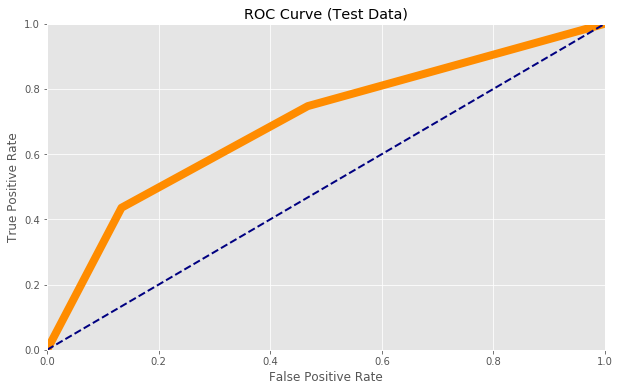

In [38]:
# to check that the roc_curve and plot_roc_curve methods work

thresholds=  [ 1, 0.8,  0.6, 0.4, 0.2 ]

fpr, tpr= roc_curve(thresholds, y_train, predict_prob, confusion_matrix, recall)
plot_roc_curve(fpr, tpr, label =None)

In [39]:
# area under AUC
auc_from_fpr_tpr( tpr, 0.2)

0.5365369946605645

#### a. Use accuracy and F1 score to compare your predictions to the expected label.

In [40]:
# return a matrix: accurary and generalizationerror
accuracy = accuracyGeneralizationError(y_train, y_predicted)
accuracy[0] 

0.801735136514417

In [41]:
F1 = F1_score(y_train, y_predicted)
F1

0.8581340149716997

#### b. Standardize each feature of your training set (subtract mean and divide by standard deviation

In [42]:
def standardization(X_train, X_test):
    
    mean = np.zeros(X_train.shape[1])
    sdt = np.zeros(X_train.shape[1])
    
    for index in range( 0, X_train.shape[1] ):
        mean[index] = X_train[:,index].mean()
        sdt[index] = X_train[:, index].std()
        X_train[:, index] =  ( X_train[:, index] - mean[index]  ) / sdt[index]
        #print( dataset[:, index])
    for i in range ( 0, X_test.shape[1] ):
        X_test[:, index] =  ( X_test[:, index] - mean[i]  ) / sdt[i]
        
    return X_train, X_test

    

In [43]:
X_train_stand, X_test_stand = standardization(X_train, X_test)
#X_test_stand

#### c. Rerun the kNN model on the standardized data, find the accuracy and F1 score with the expected labels

In [44]:
knn = KNN()
knn.fit(X_train_stand, y_train, 5, euclidianDistance)
'''????????'''
y_predicted, predic_prob = knn.predict(X_train_stand) 


In [45]:
accuracy = accuracyGeneralizationError(y_train, y_predicted)
print("Accuracy: ", accuracy[0] )

Accuracy:  0.8366930339372289


In [46]:
F1 = F1_score(y_train, y_predicted)
print("F1 score: ", F1)

F1 score:  0.8811734125510583


### We have a better score after scaling the data. Thus we will use standardized data.

# Part C: Model Evaluation

### 22. Write the S-fold (aka k-Fold) cross-validation function

#### S-partition of the data

In [47]:


xtrain = X_train
ytrain = y_train


folds = 5
folds_size = int(X_train.shape[0]/5)
i=0
start=0
end= folds_size
# print(X_train[start:end])
train_data = []
while i < folds:

    train_data.append( (start, end))
    start= end+1
    end += folds_size
    i+=1

In [48]:
train_data[4]

(3133, 3915)

In [49]:
print(X_train.shape)
int(X_train.shape[0]/5)

(3919, 10)


783

In [50]:
def s_fold(folds,xtrain, ytrain, KNN, error_function, **kwargs):
    
    F1 = 0
    
    expected_predicted_labels = []
#     folds = 5
    folds_size = int(X_train.shape[0]/5)
    
    def S_partition():
    
        i=0
        start=0
        end= folds_size
        # print(X_train[start:end])
        train_data_index = []
        
        while i < folds:
            train_data_index.append( (start, end))
            start= end+1
            end += folds_size
            i+=1
            
        return train_data_index
        
    index = S_partition()
    
    for i,j in enumerate(index):
           
        k =kwargs["k"]
        fct = kwargs["distance"]
        knn = KNN()
        knn.fit( np.delete(X_train, np.s_[j[0]: j[1]], axis=0), np.delete(y_train, np.s_[j[0]: j[1]], axis=0), k, fct )
        '''????????????????????????????'''
        y_predicted, predic_prob = knn.predict( y_train[ j[0]: j[1] ] )
        
#         print("y_train[ j[0]: j[1] ]", y_train[ j[0]: j[1] ])
        
        F1 += error_function( np.delete(y_train, np.s_[j[0]: j[1]], axis=0), y_predicted )
                
        expected_predicted_labels.append( (np.delete(y_train, np.s_[j[0]: j[1]], axis=0), y_predicted) )
      
    # return expected labels, predicted labels , average error (F1)   
    return expected_predicted_labels, F1/folds

#  23. Use your S-fold function to evaluate the performance of your model

In [51]:
# y = np_df[:,-1]

In [52]:
K = [1, 5, 9, 11]
distance =  [ "Euclidian", "Manhattan"]

In [53]:
dic = { }
result = {}
result_s = []
for folds in K:
    dic["k"] = folds 
    for j, d in enumerate(distance):
        if d == "Euclidian":
            dic["distance"] = euclidianDistance
        else:
            dic["distance"] = ManhattanDistance
         
        exp_pred_labels , f1 = s_fold(10,X_train, y_train, KNN, F1_score, **dic)
        result["k"] = folds
        result["distance"] = d
        result["F1"] = f1
        result["expected_labels"] = exp_pred_labels[0]
        result["predicted_labels"] = exp_pred_labels[1]
        
        
        result_s.append(result)
        

In [54]:
f1

0.31676645160199773

In [55]:
result_s[0]

{'k': 11,
 'distance': 'Manhattan',
 'F1': 0.31676645160199773,
 'expected_labels': (array([0, 0, 1, ..., 1, 0, 0]),
  array([1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
         1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
         1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
         0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
         1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
         1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
         0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
         0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
         0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 1., 0., 0., 1.,

In [56]:
len(result)

5

# 25. Evaluate your model on the test data and report the performance measures

In [57]:
test_y_predicted, tes_predic_prob = knn.predict(y_test)
test_y_predicted

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

### a. Precision

In [58]:
test_precision = precision(y_test, y_predicted)
print("precision: ",test_precision)

precision:  0.6503597122302158


### b. Recall

In [59]:
test_recall = recall(y_test, y_predicted)
print("recall: ",test_recall)

recall:  0.710691823899371


### c. F1

In [60]:
test_F1 = F1_score(y_test, y_predicted)
print("F1 score: ", test_F1)

F1 score:  0.6791885800150262


### d. Confusion matrix

In [61]:
test_matrix = confusion_matrix(y_test, y_predicted)
print("confusion matrix: ",test_matrix)

confusion matrix:  [[100. 243.]
 [184. 452.]]


### e. Accuracy

In [62]:
accuracy = accuracyGeneralizationError(y_train, y_predicted)
print("Accuracy: ", accuracy[0] )

Accuracy:  0.8366930339372289


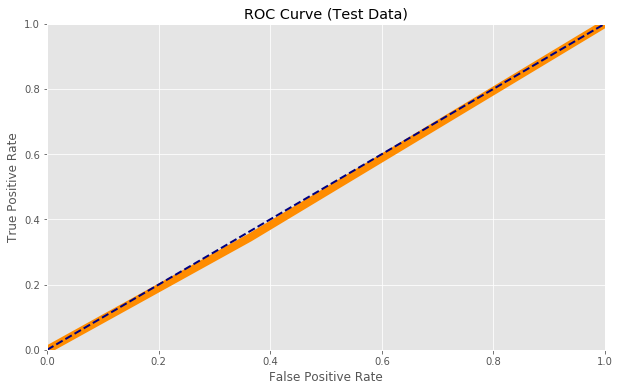

In [63]:
thresholds=  [ 1, 0.9,   0.73,  0.33,  0.2, 0.1, 0.06 ]

fpr, tpr= roc_curve(thresholds, y_train, tes_predic_prob, confusion_matrix, recall)
plot_roc_curve(fpr, tpr, label =None)

# 25. Calculate and report the 95% confidence interval on the generalization error estimate

In [64]:
import math
# z = 1.96 for 95% confidence interval
z = 1.96
generalization_error = accuracy = accuracyGeneralizationError(y_train, y_predicted)[1]
# standard_error = sqrt(p(1-p)/n)
standard_error = math.sqrt(generalization_error*( 1- generalization_error) / y_train.shape[0])
standard_error

0.005904699494121832